In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784')

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [4]:
X,y=mnist['data'],mnist['target']

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
some_digit=X[35864]
some_digit_image=some_digit.reshape(28,28)

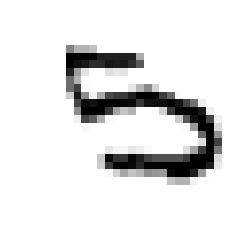

In [9]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [10]:
y[35864]

'5'

In [11]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [12]:
import numpy as np

In [13]:
shuffle_index=np.random.permutation(60000)

In [14]:
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

In [15]:
from sklearn.linear_model import SGDClassifier

In [16]:
sgd_clf=SGDClassifier(random_state=69)

In [17]:
y_train_5=(y_train=='5')

In [18]:
y_test_5=(y_test=='5')

In [19]:
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=69, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
sgd_clf.predict([some_digit])

array([ True])

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [22]:
skfolds=StratifiedKFold(n_splits=3,random_state=69)

In [23]:
for train_index , test_index in skfolds.split(X_train,y_train_5):
    clone_clf=clone(sgd_clf)
    X_train_folds=X_train[train_index]
    X_test_fold=X_train[test_index]
    y_train_folds=y_train[train_index]
    y_test_fold=y_train[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))
    

0.8772
0.8718
0.85205


In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.96265, 0.95795, 0.96545])

In [26]:
from sklearn.model_selection import cross_val_predict

In [27]:
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [28]:
from sklearn.metrics import confusion_matrix


In [29]:
print(type(y_train_pred[18]))
print(type(y_train_5[18]))

<class 'numpy.bool_'>
<class 'numpy.bool_'>


In [30]:
confusion_matrix(y_train_5,y_train_pred)

array([[53199,  1380],
       [  899,  4522]], dtype=int64)

In [31]:
from sklearn.metrics import precision_score,recall_score

In [32]:
precision_score(y_train_5,y_train_pred)

0.7661809556082684

In [33]:
recall_score(y_train_5,y_train_pred)

0.8341634384799852

In [34]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7987282522299745

In [35]:
y_scores=sgd_clf.decision_function([some_digit])

In [36]:
y_scores

array([3724.59026353])

In [37]:
threshold=0
y_some_digit_pred=(y_scores>threshold)

In [38]:
y_some_digit_pred

array([ True])

In [39]:
threshold =20000
y_some_digit_pred=(y_scores>threshold)

In [40]:
y_some_digit_pred

array([False])

In [41]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [42]:
y_scores

array([ -1701.76572111,  -2773.31002988, -51422.43274087, ...,
       -11714.76967526, -12258.43454941, -19979.45732239])

In [43]:
from sklearn.metrics import precision_recall_curve

In [44]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

In [45]:
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

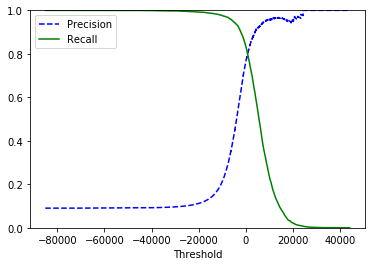

In [46]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

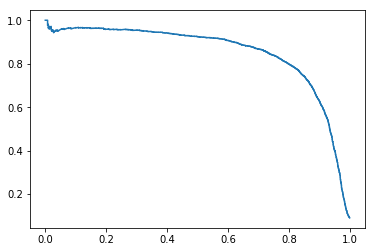

In [47]:
plt.plot(recalls,precisions)

In [48]:
y_train_pred_90=(y_scores>7000)

In [49]:
precision_score(y_train_5,y_train_pred_90)

0.9416630387461907

In [50]:
recall_score(y_train_5,y_train_pred_90)

0.3990038738240177

In [51]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds= roc_curve(y_train_5 , y_scores)

In [52]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

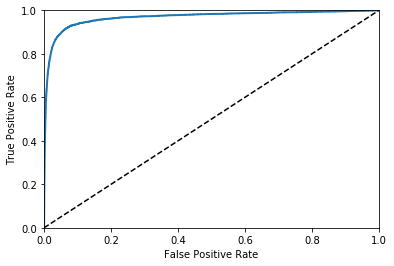

In [53]:
plot_roc_curve(fpr,tpr)

In [54]:
from sklearn.metrics import roc_auc_score

In [55]:
roc_auc_score(y_train_5,y_scores)

0.9678832616016535

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
forest_clf=RandomForestClassifier(random_state=38)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')

c:\users\sai\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\sai\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\sai\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [58]:
y_scores_forest=y_probas_forest[:,1]

In [59]:
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

c:\users\sai\appdata\local\programs\python\python37\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


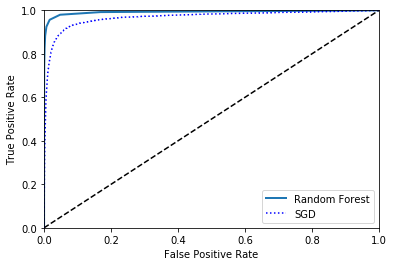

In [60]:
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.plot(fpr,tpr,"b:",label="SGD")
plt.legend(loc="bottom right")


In [61]:
roc_auc_score(y_train_5,y_scores_forest)

0.9924255040998892

In [62]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array(['6'], dtype='<U1')

In [63]:
some_digit_scores = sgd_clf.decision_function([some_digit])


In [64]:
some_digit_scores

array([[-35160.62855462, -31018.32364018, -23561.09969665,
         -2295.11792288, -10116.34409781,   1449.68926494,
          5450.54683723, -14564.79522695,  -5605.80735903,
        -25100.20411874]])

In [65]:
np.argmax(some_digit_scores)

6

In [66]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [67]:
sgd_clf.classes_[5]

'5'

In [68]:
from sklearn.multiclass import OneVsOneClassifier

In [69]:
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=38))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array(['5'], dtype=object)

In [70]:
len(ovo_clf.estimators_)

45

In [71]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

c:\users\sai\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array(['5'], dtype=object)

In [72]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0.1, 0.8, 0.1, 0. , 0. , 0. ]])

In [77]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.86477704, 0.88359418, 0.88738311])

In [78]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

c:\users\sai\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.90006999, 0.90269513, 0.89763465])

In [80]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

c:\users\sai\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5579,    0,   15,    6,    9,   47,   32,    7,  227,    1],
       [   1, 6418,   41,   21,    3,   43,    6,    7,  189,   13],
       [  23,   30, 5269,   81,   68,   22,   65,   37,  355,    8],
       [  28,   24,  117, 5233,    1,  210,   26,   42,  377,   73],
       [  13,   15,   46,   11, 5222,   11,   32,   20,  314,  158],
       [  26,   15,   28,  158,   54, 4462,   83,   15,  517,   63],
       [  28,   17,   52,    2,   44,   81, 5557,    3,  134,    0],
       [  19,   16,   50,   28,   51,   11,    4, 5706,  187,  193],
       [  17,   66,   40,   95,    3,  115,   32,    8, 5431,   44],
       [  23,   22,   30,   56,  120,   32,    1,  178,  356, 5131]],
      dtype=int64)

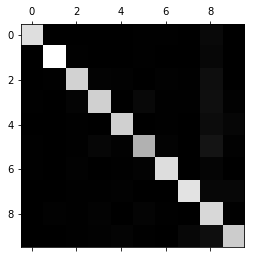

In [81]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [82]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

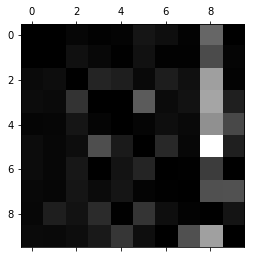

In [83]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

TypeError: 'tuple' object is not callable

c:\users\sai\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  
c:\users\sai\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\sai\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
c:\users\sai\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise co

ZeroDivisionError: integer division or modulo by zero

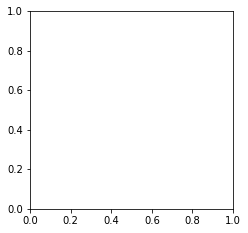

In [104]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [111]:
list(map(int,y_train))


[6,
 3,
 0,
 6,
 2,
 2,
 7,
 5,
 9,
 0,
 3,
 7,
 2,
 3,
 9,
 9,
 5,
 0,
 9,
 6,
 0,
 6,
 0,
 9,
 1,
 6,
 8,
 7,
 1,
 6,
 8,
 5,
 9,
 4,
 2,
 3,
 1,
 8,
 0,
 0,
 5,
 3,
 3,
 5,
 4,
 6,
 1,
 0,
 1,
 5,
 7,
 2,
 9,
 9,
 3,
 3,
 0,
 4,
 9,
 6,
 2,
 9,
 3,
 7,
 0,
 1,
 4,
 0,
 9,
 1,
 1,
 2,
 6,
 5,
 2,
 3,
 5,
 1,
 9,
 8,
 1,
 6,
 0,
 4,
 6,
 9,
 1,
 3,
 1,
 4,
 0,
 6,
 3,
 1,
 4,
 3,
 8,
 0,
 0,
 1,
 9,
 6,
 8,
 4,
 7,
 1,
 5,
 0,
 7,
 0,
 2,
 2,
 3,
 3,
 6,
 8,
 0,
 3,
 8,
 9,
 4,
 8,
 2,
 4,
 4,
 6,
 6,
 6,
 7,
 3,
 1,
 1,
 8,
 8,
 2,
 5,
 3,
 7,
 2,
 9,
 6,
 1,
 0,
 6,
 5,
 2,
 3,
 5,
 9,
 6,
 6,
 7,
 2,
 9,
 3,
 1,
 7,
 1,
 0,
 9,
 8,
 5,
 5,
 5,
 6,
 0,
 5,
 7,
 3,
 6,
 1,
 9,
 8,
 0,
 1,
 6,
 6,
 6,
 1,
 6,
 8,
 4,
 4,
 1,
 0,
 9,
 9,
 1,
 7,
 1,
 9,
 1,
 7,
 7,
 0,
 0,
 8,
 1,
 6,
 5,
 0,
 6,
 3,
 2,
 4,
 9,
 8,
 9,
 5,
 8,
 3,
 1,
 4,
 7,
 0,
 9,
 3,
 3,
 3,
 5,
 2,
 7,
 1,
 8,
 1,
 6,
 3,
 6,
 1,
 3,
 3,
 7,
 5,
 1,
 2,
 7,
 7,
 4,
 7,
 7,
 6,
 4,
 4,
 5,
 8,
 9,
 4,
 3,
 6,
 2,


In [172]:
from sklearn.neighbors import KNeighborsClassifier
y_train=list(map(int,y_train))

y_train_large.append([y_train>= [7]])
np.array([y_train_large]).shape
y_train_odd.append(y%2==1 for y in y_train)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [164]:
y_train_large.size


AttributeError: 'list' object has no attribute 'size'

In [136]:
knn_clf.predict([some_digit])

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

In [ ]:
noise = rnd.randint(0, 100, (len(X_train), 784))
noise = rnd.randint(0, 100, (len(X_test), 784))
X_train_mod = X_train + noise
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)